In [266]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Reading the data file and size inspection

In [347]:
df = pd.read_csv("loan.csv")

E:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [348]:
df.shape

(39717, 111)

In [349]:
pd.set_option('display.max_columns', 200)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [350]:
pd.set_option('display.max_info_columns', 200)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

In [351]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

# Data cleaning

## 1. Removing the columns which have only blank values

In [352]:
## check percentage of nulls in each columns
nulls =df.isnull().sum()/len(df)*100
nulls

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [353]:
## names of all columns which have null values in all rows  100% nulls
null_only_cols = nulls[nulls ==100].index
null_only_cols


Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [354]:
## drop those columns
df = df.drop(null_only_cols, axis = 1)

In [355]:
## check the new size of dataframe to confirm dropped columns
df.shape

(39717, 57)

In [356]:
## recheck null data
nulls =df.isnull().sum()/len(df)*100
nulls

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


### 2. Investigatingtwo more columns which have more than  90% of values as null

In [357]:
## two more colmns have more than 90% of null values, let us have a quick look at the columns 

df['next_pymnt_d'].describe()          

count       1140
unique         2
top       Jun-16
freq        1125
Name: next_pymnt_d, dtype: object

In [358]:
## as the above result shows most of the loan applications have same data for this field, it is not much informative.
#let us drop it as well
df.drop('next_pymnt_d', axis =1, inplace = True)

In [359]:
df['mths_since_last_record'].describe()

count    2786.000000
mean       69.698134
std        43.822529
min         0.000000
25%        22.000000
50%        90.000000
75%       104.000000
max       129.000000
Name: mths_since_last_record, dtype: float64

In [360]:
## A very small records are present and it seems like a bias to fix it with average/median, we'll drop this as well.
df.drop('mths_since_last_record', axis =1, inplace = True)

### 3. remaining  columns with null values

In [362]:
##check the columns which have null data again
nulls  = df.isnull().sum()/len(df) * 100
nulls = nulls[nulls>0].sort_values(ascending = False)
nulls

mths_since_last_delinq        64.662487
desc                          32.580507
emp_title                      6.191303
emp_length                     2.706650
pub_rec_bankruptcies           1.754916
last_pymnt_d                   0.178765
collections_12_mths_ex_med     0.140998
chargeoff_within_12_mths       0.140998
revol_util                     0.125891
tax_liens                      0.098195
title                          0.027696
last_credit_pull_d             0.005036
dtype: float64

#### still 12 columns have null values. we'll inspect and drop/imputate them one by one

In [363]:
df[nulls.index].describe(include = 'all')

,mths_since_last_delinq,desc,emp_title,emp_length,pub_rec_bankruptcies,last_pymnt_d,collections_12_mths_ex_med,chargeoff_within_12_mths,revol_util,tax_liens,title,last_credit_pull_d
count,14035.000000,26777,37258,38642,39020.000000,39646,39661.0,39661.0,39667,39678.0,39706,39715
unique,NaN,26527,28820,11,NaN,101,NaN,NaN,1089,NaN,19615,106
top,NaN,,US Army,10+ years,NaN,May-16,NaN,NaN,0%,NaN,Debt Consolidation,May-16
freq,NaN,210,134,8879,NaN,1256,NaN,NaN,977,NaN,2184,10308
mean,35.900962,NaN,NaN,NaN,0.043260,NaN,0.0,0.0,NaN,0.0,NaN,NaN
std,22.020060,NaN,NaN,NaN,0.204324,NaN,0.0,0.0,NaN,0.0,NaN,NaN
min,0.000000,NaN,NaN,NaN,0.000000,NaN,0.0,0.0,NaN,0.0,NaN,NaN
25%,18.000000,NaN,NaN,NaN,0.000000,NaN,0.0,0.0,NaN,0.0,NaN,NaN
50%,34.000000,NaN,NaN,NaN,0.000000,NaN,0.0,0.0,NaN,0.0,NaN,NaN
75%,52.000000,NaN,NaN,NaN,0.000000,NaN,0.0,0.0,NaN,0.0,NaN,NaN


##### 3.1 field 'last_credit_pull_d'

In [364]:
df[df['last_credit_pull_d'].isnull()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
26025,575712,740467,5000,5000,5000.0,36 months,11.12%,163.98,B,B3,NaN,5 years,RENT,96000.0,Not Verified,Sep-10,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,for my toy business,900xx,CA,4.04,0,Oct-97,0,NaN,4,0,7172,80.60%,9,f,0.0,0.0,3362.960000,3362.96,2553.55,702.45,0.0,106.96,1.34,Jun-12,163.98,NaN,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
39476,186499,186347,1000,1000,875.0,36 months,7.12%,30.94,A,A1,NaN,< 1 year,MORTGAGE,120000.0,Not Verified,Dec-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,No more then 25$ per lender. Please read the r...,other,Research On Global Warming,941xx,CA,0.65,0,Jul-97,1,0.0,7,0,2227,3.80%,37,f,0.0,0.0,1110.813028,971.96,1000.00,110.81,0.0,0.00,0.00,Aug-10,185.80,NaN,0.0,1,INDIVIDUAL,0,0.0,0,NaN,0.0


In [365]:
#only two records are present with this field as null. let us drop these two rows
df = df[~df['last_credit_pull_d'].isnull()]

##### 3.2 field 'last_pymnt_d'

In [366]:
df[(df['last_pymnt_d'].isnull()) & (df['loan_status'] != 'Charged Off')]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


In [367]:
#  only 71 records for which  last_pymnt_d is a blank field, all charged off loans. let us drop these rows too.

df = df[~df['last_pymnt_d'].isnull()]

In [368]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2450
emp_length                     1070
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12914
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

#### 3.3 field 'desc'

In [369]:
df[~df.desc.isna()]['desc']


0          Borrower added on 12/22/11 > I need to upgra...
1          Borrower added on 12/22/11 > I plan to use t...
3          Borrower added on 12/21/11 > to pay for prop...
4          Borrower added on 12/21/11 > I plan on combi...
6          Borrower added on 12/18/11 > I am planning o...
                               ...                        
39708    I would like to pay off my high-interest credi...
39711    I'd like to shift some credit card debt so it ...
39712    Our current gutter system on our home is old a...
39713    The rate of interest and fees incurred by carr...
39716    I plan to consolidate over $7,000 of debt: a c...
Name: desc, Length: 26730, dtype: object

In [370]:
## desc seems to be free text field. for completeness, let us  replace NAs with blank. though would we ever use it?
df.desc.fillna("", inplace = True)


#### 3.4 field 'collections_12_mths_ex_med'

In [371]:
df.collections_12_mths_ex_med.value_counts()

0.0    39588
Name: collections_12_mths_ex_med, dtype: int64

In [372]:
## all applications has collections_12_mths_ex_med =0.  so distinction/decision on this field. let us drop this field too

df.drop('collections_12_mths_ex_med', axis =1, inplace = True)

#### 3.5 field 'emp_length'

In [373]:
df[df.emp_length.isna()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
168,1067644,1302032,2500,2500,2500.00000,36 months,7.51%,77.78,A,A3,NaN,NaN,OWN,12000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/13/11 > TO CONSOLIDATE ...,debt_consolidation,GET FREE OF DEBT,961xx,CA,16.30,0,Aug-94,2,NaN,13,0,4853,42.20%,20,f,0.0,0.0,1838.880000,1838.88,1575.06,253.74,0.00,10.08,0.0000,Dec-13,77.78,May-16,1,INDIVIDUAL,0,0.0,0,0.0,0.0
323,1058717,1290516,18000,18000,18000.00000,60 months,17.58%,452.98,D,D4,NaN,NaN,MORTGAGE,60000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/12/11 > I plan to pay o...,debt_consolidation,consolidation,363xx,AL,21.96,0,Mar-03,1,75.0,11,0,5945,83.70%,28,f,0.0,0.0,26378.550010,26378.55,18000.00,8378.55,0.00,0.00,0.0000,Sep-15,6909.59,Sep-15,1,INDIVIDUAL,0,0.0,0,0.0,0.0
394,1064582,1298394,4000,4000,4000.00000,36 months,11.71%,132.31,B,B3,NaN,NaN,RENT,24000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/10/11 > fix steps on po...,home_improvement,Reline pool and fix steeps,328xx,FL,7.50,1,Feb-05,0,16.0,4,0,1593,54.90%,6,f,0.0,0.0,4186.023030,4186.02,4000.00,186.02,0.00,0.00,0.0000,May-12,3658.15,May-12,1,INDIVIDUAL,0,0.0,0,0.0,0.0
422,1064366,1298164,1000,1000,1000.00000,36 months,14.65%,34.50,C,C3,NaN,NaN,RENT,18408.0,Not Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,,major_purchase,Myloan,080xx,NJ,6.00,0,Apr-93,2,NaN,3,1,2510,83.70%,8,f,0.0,0.0,91.310000,91.31,22.24,12.18,0.00,56.89,10.2402,Jan-12,34.50,Jun-12,1,INDIVIDUAL,0,0.0,0,1.0,0.0
439,1063912,1296491,8250,8250,8250.00000,36 months,7.51%,256.67,A,A3,NaN,NaN,MORTGAGE,31500.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/09/11 > i am looking ro...,debt_consolidation,do over,218xx,MD,17.87,0,Dec-81,4,NaN,17,0,7521,10.40%,37,f,0.0,0.0,9239.889998,9239.89,8250.00,989.89,0.00,0.00,0.0000,Dec-14,278.92,Dec-14,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32591,480410,610728,10000,10000,9975.00000,36 months,14.22%,342.85,C,C5,NaN,NaN,RENT,45000.0,Not Verified,Jan-10,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 01/27/10 > We run a succes...,small_business,Expanding Salon Business,191xx,PA,4.51,0,Sep-00,0,37.0,9,0,9696,66.40%,17,f,0.0,0.0,10457.944160,10431.80,10000.00,457.94,0.00,0.00,0.0000,Jun-10,9431.97,Jul-10,1,INDIVIDUAL,0,0.0,0,0.0,0.0
32608,480216,610335,3700,3700,3700.00000,36 months,14.22%,126.86,C,C5,NaN,NaN,RENT,17496.8,Not Verified,Jan-10,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 01/27/10 > This loan will ...,other,Financial Freedom,752xx,TX,3.36,0,Aug-06,0,NaN,2,0,1605,45.90%,5,f,0.0,0.0,4566.723907,4566.72,3700.00,866.72,0.00,0.00,0.0000,Feb-13,132.70,Apr-16,1,INDIVIDUAL,0,0.0,0,0.0,0.0
32621,479954,609955,10000,10000,9731.17513,36 months,14.22%,342.85,C,C5,NaN,NaN,MORTGAGE,36000.0,Not Verified,Jan-10,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,,other,Retired & Happy,021xx,MA,3.83,2,Apr-00,3,19.0,3,0,3

In [376]:
df.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', '0  years'],
      dtype=object)

In [377]:
## rather than guessing just fill in with 0 for completeness
##df.loc[df['emp_length'] == 0]['emp_length'] = "0 years"
df.emp_length.fillna("0  years", inplace = True)

#### 3.6 field 'emp_title'

In [378]:
print(len(df.emp_title.unique()))
print(df.emp_title.value_counts())

28770
US Army                         133
Bank of America                 109
IBM                              66
AT&T                             59
Kaiser Permanente                56
                               ... 
Autodesk                          1
Milbank                           1
West Coast Drywall and Paint      1
Gernal Motors                     1
Phoenix House Foundation          1
Name: emp_title, Length: 28769, dtype: int64


In [379]:
#above shows quite a variation. hardly a categorical data.  though would we ever use   it?
#let us see assign NAs to another value to identify them as not specified i.e. Not Specified. OTHER is already available in data
df.emp_title.fillna("Not Specified", inplace = True)

#### 3.7 field 'title'

In [380]:
print(df.title.value_counts())
print(df.title.unique())
      

Debt Consolidation                           2181
Debt Consolidation Loan                      1725
Personal Loan                                 657
Consolidation                                 516
debt consolidation                            505
                                             ... 
Consolidation Solution                          1
liz and loren                                   1
Just need to pay off bills in one payment       1
Personal Loan Debt                              1
Gettin' out of the hole                         1
Name: title, Length: 19584, dtype: int64
['Computer' 'bike' 'real estate business' ... 'Retiring credit card debt'
 'MBA Loan Consolidation' 'JAL Loan']


In [381]:
## from data dictionary and data in table, it seems to be a free text information from borrower
#let us fill it with space for completion . though would we ever use   it?
df.title.fillna("", inplace = True)

#### 3.8 field 'tax_liens'

In [382]:
print(df.tax_liens.value_counts())
print(df.tax_liens.unique())

0.0    39605
Name: tax_liens, dtype: int64
[ 0. nan]


In [383]:
## all fields are either 0 or null. so no decision to be made on this field. let us drop this as well.
## A very small records are present and it seems like a bias to fix it with average/median, we'll drop this as well.
df.drop('tax_liens', axis =1, inplace = True)

#### 3.9 field 'revol_util'

In [384]:
print(df.revol_util.isna().sum())
print(df.revol_util.value_counts())
print(df.revol_util.unique())

46
0%        975
63%        62
0.20%      62
0.10%      58
66.70%     58
         ... 
6.75%       1
11.63%      1
17.67%      1
46.74%      1
57.56%      1
Name: revol_util, Length: 1089, dtype: int64
['83.70%' '9.40%' '98.50%' ... '49.63%' '0.04%' '7.28%']


In [385]:
## difficult to fix it without assuming stuff. only 46 rows exist. let us drop those rows
df = df[~df.revol_util.isna()]

#### 3.10 field 'chargeoff_within_12_mths' 

In [386]:
print(df.chargeoff_within_12_mths.value_counts())
print(df.chargeoff_within_12_mths.unique())

0.0    39542
Name: chargeoff_within_12_mths, dtype: int64
[ 0. nan]


In [387]:
## all rows have value zero. no decision to be made on this field. let us drop this field
df.drop('chargeoff_within_12_mths', axis =1, inplace = True)

#### 3.11 field 'pub_rec_bankruptcies' 

In [388]:
print(df.pub_rec_bankruptcies.value_counts())
print(df.pub_rec_bankruptcies.unique())
print(df.pub_rec_bankruptcies.isna().sum())

0.0    37228
1.0     1667
2.0        7
Name: pub_rec_bankruptcies, dtype: int64
[ 0.  1.  2. nan]
696


In [389]:
## 0 is the median and mode for the field. let us fill NAs here with 0.

df.pub_rec_bankruptcies.fillna(0, inplace = True)

#### 3.12 field 'mths_since_last_delinq' 

In [390]:
print(df.mths_since_last_delinq.value_counts())
print(df.mths_since_last_delinq.unique())
print(df.mths_since_last_delinq.isna().sum())
      

0.0      442
15.0     251
30.0     247
23.0     246
24.0     241
        ... 
115.0      1
106.0      1
95.0       1
120.0      1
89.0       1
Name: mths_since_last_delinq, Length: 95, dtype: int64
[ nan  35.  38.  61.   8.  20.  18.  68.  45.  48.  41.  40.  74.  25.
  53.  39.  10.  26.  56.  77.  28.  52.  24.  16.  60.  54.  23.   9.
  11.  13.  65.  19.  80.  22.  59.  79.  44.  64.  57.  14.  63.  49.
  15.  73.  70.  29.  51.   5.  75.  55.   2.  30.  47.  33.  69.   4.
  43.  21.  27.  46.  81.  78.  82.  31.  76.  62.  72.  42.  50.   3.
  12.  67.  36.  34.  58.  17.  71.  66.  32.   6.  37.   7.   1.  83.
  86. 115.  96. 103. 120. 106.  89. 107.  85.  97.  95.   0.]
25600


In [391]:
#quite a lot of varied data, let us look at few sample records 
df[df.mths_since_last_delinq.isna()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,Not Specified,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,May-16,1,INDIVIDUAL,0,0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,Sep-13,1,INDIVIDUAL,0,0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,Not Specified,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.00,0.00,Jun-14,649.91,May-16,1,INDIVIDUAL,0,0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,NaN,9,0,7963,28.30%,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.0,0.00,0.00,Jan-15,161.03,Jan-16,1,INDIVIDUAL,0,0,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/18/11 > I am planning o...,debt_consolidation,Loan,280xx,NC,23.51,0,Jul-05,1,NaN,7,0,17726,85.60%,11,f,0.0,0.0,10110.840000,10110.84,6985.61,3125.23,0.0,0.00,0.00,May-16,1313.76,May-16,1,INDIVIDUAL,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39650,84918,84914,5000,5000,2025.0,36 months,7.43%,155.38,A,A2,Revere Public Schools,10+ years,MORTGAGE,65000.0,Not Verified,Sep-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,I'd like to pay off a car loan.,other,car,024xx,MA,0.28,0,Dec-94,1,NaN,12,0,1576,5.70%,21,f,0.0,0.0,5200.462983,2106.19,5000.00,200.46,0.0,0.00,0.00,Apr-08,4268.52,Jun-07,1,INDIVIDUAL,0,0,0.0
39659,121568,121574,4000,4000,1925.0,36 months,9.64%,128.41,B,B4,Not Specified,< 1 year,NONE,100000.0,Not Verified,Aug-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,I took a high interest loan from Citibank in 2...,other,Refinancing high interest loan,950xx,CA,15.00,0,May-99,1,NaN,6,0,8155,14.90%,8,f,0.0,0.0,4622.489229,2224.58,4000.00,622.49,0.0,0.00,0.00,Sep-10,129.76,Aug-07,1,INDIVIDUAL,0,0,0.0
39660,121535,121373,2800,2800,1625.0,36 months,8.70%,88.65,B,B1,Not Specified,< 1 year,NONE,120000.0,Not Verified,Aug-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The family is expanding in October and we are ...,other,Baby is coming,024xx,MA,15.00,0,May-99,1,NaN,6,0,8155,14.90%,8,f,0.0,0.0,3191.218575,1852.05,2800.00,391.22,0.0,0.00,0.00,Sep-10,89.80,Aug-07,1,I

In [392]:
## above table shows that it is null when rest of deliq data columns show that account is not delinquent.
#let check this theory in which case we can safely replace NAs as 0

df[(df.mths_since_last_delinq.isna()) &  ~((df.delinq_2yrs == 0)  & (df.acc_now_delinq == 0 )& (df.delinq_amnt == 0))]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies


In [393]:
df[(df.mths_since_last_delinq == 0) &  ~((df.delinq_2yrs == 0)  & (df.acc_now_delinq == 0 )& (df.delinq_amnt == 0))]


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies


In [394]:
## looks like the right assumption. let us set the NAs to 0

df.mths_since_last_delinq.fillna(0, inplace = True)

In [395]:
## finally check if there are any nulls left in our data- ALL GOOD
df.isna().sum().sum()

0

### Additional data amputation

In [396]:
print(df.shape)

(39598, 52)


In [397]:
df['application_type'].value_counts()

INDIVIDUAL    39598
Name: application_type, dtype: int64

In [398]:
## all loan application types are INDIVIDUAL, no joint applications. so distinction/decision on this field. let us drop this field too
df.drop('application_type', axis =1, inplace = True)

In [399]:
df.policy_code.value_counts()

1    39598
Name: policy_code, dtype: int64

In [400]:
## all loan policy_code are 1. so distinction/decision on this field. let us drop this field too
df.drop('policy_code', axis =1, inplace = True)

In [401]:
df.pymnt_plan.value_counts()

n    39598
Name: pymnt_plan, dtype: int64

In [402]:
## all loan pymnt_plan are n. so distinction/decision on this field. let us drop this field too
df.drop('pymnt_plan', axis =1, inplace = True)

In [403]:
## similarly URL is page url for each loan application, irrelevant to this analysis. drop this too.
df.drop('url', axis =1, inplace = True)

### Data type correction

In [404]:
# let us first confirm again no nulls in data
print(df.isnull().sum().sum())
print(df.info())


0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 39598 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39598 non-null  int64  
 1   member_id                39598 non-null  int64  
 2   loan_amnt                39598 non-null  int64  
 3   funded_amnt              39598 non-null  int64  
 4   funded_amnt_inv          39598 non-null  float64
 5   term                     39598 non-null  object 
 6   int_rate                 39598 non-null  object 
 7   installment              39598 non-null  float64
 8   grade                    39598 non-null  object 
 9   sub_grade                39598 non-null  object 
 10  emp_title                39598 non-null  object 
 11  emp_length               39598 non-null  object 
 12  home_ownership           39598 non-null  object 
 13  annual_inc               39598 non-null  float64
 14  verification_status 

In [405]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,Not Specified,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,0.0,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0,0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,0.0,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0,0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,Not Specified,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,0.0,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0,0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0,0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0,0,0.0


#### 4.1 Date fields

In [406]:
date_cols =  list(df.columns[df.columns.str.endswith('_d')])
date_cols.extend(['earliest_cr_line'])

In [407]:
df[date_cols].sample(5)


,issue_d,last_pymnt_d,last_credit_pull_d,earliest_cr_line
2256,Nov-11,Jan-14,Apr-15,May-04
19454,Feb-11,Jul-12,Oct-15,Oct-99
35631,Aug-09,Aug-12,Aug-12,Nov-98
16859,Apr-11,Apr-13,May-13,Mar-99
6050,Oct-11,Jun-13,Feb-14,Sep-00


In [408]:
###### all dates have only month & year info. change the data type to datetime according  to the format
def date_correction(x):
    return pd.to_datetime(x, format = "%b-%y")

df[date_cols] = df[date_cols].apply(date_correction)
    

In [409]:
# check the data again - ALL GOOD
df[date_cols].sample(5)


,issue_d,last_pymnt_d,last_credit_pull_d,earliest_cr_line
15611,2011-05-01,2012-09-01,2012-09-01,2006-09-01
35574,2009-08-01,2012-02-01,2012-03-01,1995-12-01
37578,2009-02-01,2012-02-01,2016-05-01,2001-03-01
38389,2008-10-01,2011-10-01,2015-09-01,2004-09-01
38725,2008-05-01,2011-05-01,2015-04-01,1994-08-01


In [412]:
df.emp_length.value_counts()

10    8869
1     7788
2     4377
3     4084
4     3422
5     3268
6     2225
7     1769
8     1474
9     1255
0     1067
Name: emp_length, dtype: int64

In [411]:
# removing special chars from emp_length field to change it to integer
def duration_correct(x):
    
    extra_c = '+< years'
    for c in extra_c:
        if(c in x):
            x = x.replace(c, '')
    return x

df.emp_length = pd.to_numeric(df.emp_length.apply(duration_correct), downcast = 'integer')

In [413]:
## this is a categorical info, so leave it as it is.
df['term'].value_counts()

 36 months    28997
 60 months    10601
Name: term, dtype: int64

In [414]:
df.grade.value_counts()  ## categorical data

B    12004
A    10078
C     8059
D     5278
E     2824
F     1043
G      312
Name: grade, dtype: int64

In [415]:
df.home_ownership.value_counts() ## categorical data

RENT        18817
MORTGAGE    17634
OWN          3048
OTHER          96
NONE            3
Name: home_ownership, dtype: int64

In [416]:
df.int_rate.value_counts()

10.99%    956
13.49%    824
11.49%    821
7.51%     786
7.88%     725
         ... 
17.46%      1
16.20%      1
18.72%      1
18.36%      1
16.33%      1
Name: int_rate, Length: 371, dtype: int64

In [417]:
# remove % to change interest rate field to numeric
df.int_rate = pd.to_numeric(df.int_rate.apply(lambda x:x.replace('%', '')))

In [418]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39598 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       39598 non-null  int64         
 1   member_id                39598 non-null  int64         
 2   loan_amnt                39598 non-null  int64         
 3   funded_amnt              39598 non-null  int64         
 4   funded_amnt_inv          39598 non-null  float64       
 5   term                     39598 non-null  object        
 6   int_rate                 39598 non-null  float64       
 7   installment              39598 non-null  float64       
 8   grade                    39598 non-null  object        
 9   sub_grade                39598 non-null  object        
 10  emp_title                39598 non-null  object        
 11  emp_length               39598 non-null  int8          
 12  home_ownership           39598 n

In [419]:
df.loan_status.value_counts()


Fully Paid     32915
Charged Off     5543
Current         1140
Name: loan_status, dtype: int64

In [420]:
## drop the current loans as these loans are still in progress and hence we won't have enough info to study the past trend
df1 = df[ df.loan_status != 'Current']
df1.shape

(38458, 48)

In [421]:
df1.purpose.value_counts()

debt_consolidation    18015
credit_card            5022
other                  3843
home_improvement       2867
major_purchase         2139
small_business         1744
car                    1497
wedding                 919
medical                 679
moving                  574
vacation                374
house                   365
educational             319
renewable_energy        101
Name: purpose, dtype: int64

In [422]:
df1[~(df1['revol_util'].isna()) & (df1['revol_bal']==0)].sample(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
18125,704343,896348,8000,8000,8000.0,36 months,7.29,248.08,A,A4,Annabelle's Pet Care,2,RENT,24000.0,Not Verified,2011-03-01,Fully Paid,Borrower added on 03/16/11 > I am currently ...,credit_card,AP AMEX Refinance Loan,019xx,MA,21.10,0,2005-01-01,0,0.0,6,0,0,0%,12,f,0.0,0.0,8930.835780,8930.84,8000.00,930.84,0.000000,0.00,0.00,2014-04-01,269.52,2014-04-01,0,0,0.0
31624,493019,630581,4750,4750,4750.0,36 months,10.25,153.83,B,B2,SCAD,5,MORTGAGE,49000.0,Not Verified,2010-03-01,Fully Paid,Borrower added on 03/10/10 > SCAD is a priva...,debt_consolidation,Consolidating debt,303xx,GA,0.00,0,1997-07-01,0,0.0,3,0,0,0%,17,f,0.0,0.0,4813.480000,4813.48,4750.00,63.48,0.000000,0.00,0.00,2010-05-01,2660.75,2010-06-01,0,0,0.0
11138,820174,1028377,6450,6450,6450.0,36 months,5.99,196.20,A,A2,United Healthcare,5,MORTGAGE,140987.0,Not Verified,2011-07-01,Fully Paid,,home_improvement,Pool,543xx,WI,5.75,0,1994-12-01,0,0.0,6,0,0,0%,30,f,0.0,0.0,6632.040963,6632.04,6450.00,182.04,0.000000,0.00,0.00,2012-02-01,5652.78,2012-02-01,0,0,0.0
964,1058042,1289617,8075,8075,8050.0,60 months,22.35,224.64,F,F5,Mifflin County,10,MORTGAGE,35000.0,Verified,2011-12-01,Fully Paid,Borrower added on 12/07/11 > to consolidate ...,debt_consolidation,help,170xx,PA,10.73,0,1994-02-01,2,26.0,3,0,0,0%,24,f,0.0,0.0,8226.300000,8200.83,8075.00,151.30,0.000000,0.00,0.00,2012-02-01,8227.22,2012-01-01,0,0,0.0
17851,709232,901828,4500,4500,4500.0,36 months,12.68,150.94,C,C1,Mass General Hospital,3,RENT,59000.0,Not Verified,2011-03-01,Fully Paid,Borrower added on 03/22/11 > This loan will ...,debt_consolidation,Debt Consolidation Loan,021xx,MA,11.19,0,1996-01-01,0,0.0,4,1,0,0%,8,f,0.0,0.0,5350.031351,5350.03,4500.00,850.03,0.000000,0.00,0.00,2013-06-01,1591.29,2013-06-01,0,0,1.0
16211,736199,933045,2800,2800,2800.0,36 months,10.37,90.84,B,B3,Streamray - FriendFinder Networks,5,RENT,46800.0,Not Verified,2011-04-01,Fully Paid,,other,April 2011 Personal Loan,891xx,NV,19.44,0,2000-05-01,0,36.0,3,0,0,11.62%,24,f,0.0,0.0,3270.042559,3270.04,2800.00,470.04,0.000000,0.00,0.00,2014-05-01,93.43,2014-09-01,0,0,0.0
26474,568659,731544,1600,1600,1600.0,36 months,13.98,54.67,C,C3,Ecolab,1,RENT,38400.0,Source Verified,2010-08-01,Charged Off,,wedding,Wedding,554xx,MN,8.28,0,2000-07-01,3,0.0,2,0,0,0%,5,f,0.0,0.0,283.910000,283.91,146.15,71.77,0.000000,65.99,0.64,2011-01-01,54.67,2011-06-01,0,0,0.0
27047,559251,719930,4750,4750,4750.0,36 months,11.86,157.46,B,B5,SEARS HOLDING CO.,10,OWN,22440.0,Verified,2010-08-01,Charged Off,,major_purchase,ARCHERY,968xx,HI,23.74,0,1987-09-01,0,27.0,4,0,0,0%,11,f,0.0,0.0,628.800000,628.80,447.91,180.89,0.000000,0.00,0.00,2010-12-01,157.46,2011-06-01,0,0,0.0
33043,474202,599799,2000,2000,2000.0,36 months,12.53,66.94,B,B5,Frankfort Community School District,3,RENT,20400.0,Not Verified,2010-01-01,Fully Paid,,home_improvement,Rent + House Upgrade,628xx,IL,24.35,1,2000-09-01,1,4.0,3,0,0,0%,7,f,0.0,0.0,2365.463606,2365.46,2000.00,365.46,0.000000,0.00,0.00,2012-02-01,764.48,2012-08-01,0,0,0.0
11122,820425,1028646,1625,1625,1625.0,36 months,16.89,57.85,D,D4,Boys & Girls Homes of NC,3,MORTGAGE,21120.0,Verified,2011-07-01,Charged Off,,debt_consolidation,peace of mind,284xx,NC,23.58,0,1982-12-01,0,52.0,3,0,0,0%,15,f,0.0,0.0,130.650000,130.65,48.06,67.60,14.989705,0.00,0.00,2011-11-01,72.85,2016-05-01,0,0,0.0


In [425]:
df1.revol_util = pd.to_numeric(df1.revol_util.apply(lambda x:x.replace('%', '')))
df1['revol_util'].value_counts()

E:\anaconda\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0.00     952
63.00     62
0.20      61
40.70     57
31.20     57
        ... 
25.74      1
0.54       1
8.49       1
70.26      1
36.88      1
Name: revol_util, Length: 1088, dtype: int64

In [436]:
df1.addr_state.unique()

array(['AZ', 'GA', 'IL', 'CA', 'NC', 'TX', 'VA', 'MO', 'CT', 'UT', 'FL',
       'PA', 'MN', 'NY', 'NJ', 'OR', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA',
       'WA', 'WI', 'AL', 'NV', 'AK', 'CO', 'MD', 'WV', 'VT', 'MI', 'DC',
       'SD', 'NH', 'AR', 'NM', 'KS', 'HI', 'OK', 'MT', 'WY', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID', 'IN', 'ME'], dtype=object)

In [437]:
df1['total_acc'].value_counts()

16    1422
15    1414
17    1407
14    1397
20    1389
      ... 
74       1
81       1
80       1
77       1
71       1
Name: total_acc, Length: 82, dtype: int64

In [438]:
df1['verification_status'].value_counts()

Not Verified       16628
Verified           12177
Source Verified     9653
Name: verification_status, dtype: int64

In [543]:
df1['zip_code'].value_counts()

100xx    582
945xx    530
112xx    500
606xx    493
070xx    452
        ... 
677xx      1
096xx      1
372xx      1
169xx      1
833xx      1
Name: zip_code, Length: 822, dtype: int64

In [544]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38458 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       38458 non-null  int64         
 1   member_id                38458 non-null  int64         
 2   loan_amnt                38458 non-null  int64         
 3   funded_amnt              38458 non-null  int64         
 4   funded_amnt_inv          38458 non-null  float64       
 5   term                     38458 non-null  object        
 6   int_rate                 38458 non-null  float64       
 7   installment              38458 non-null  float64       
 8   grade                    38458 non-null  object        
 9   sub_grade                38458 non-null  object        
 10  emp_title                38458 non-null  object        
 11  emp_length               38458 non-null  int8          
 12  home_ownership           38458 n

#### Data cleanup complete. In the process, we have gotten rid of 3.17% of rows and reduced the 111 fields to 48 for our further analysis
### 4. Data arrangement

In [ ]:
loan_attr_cols = df.columns[0,2,3,4,5,6,7,8,9,15,18]
consumer_attr_cols  =df.columns[]

<AxesSubplot:>

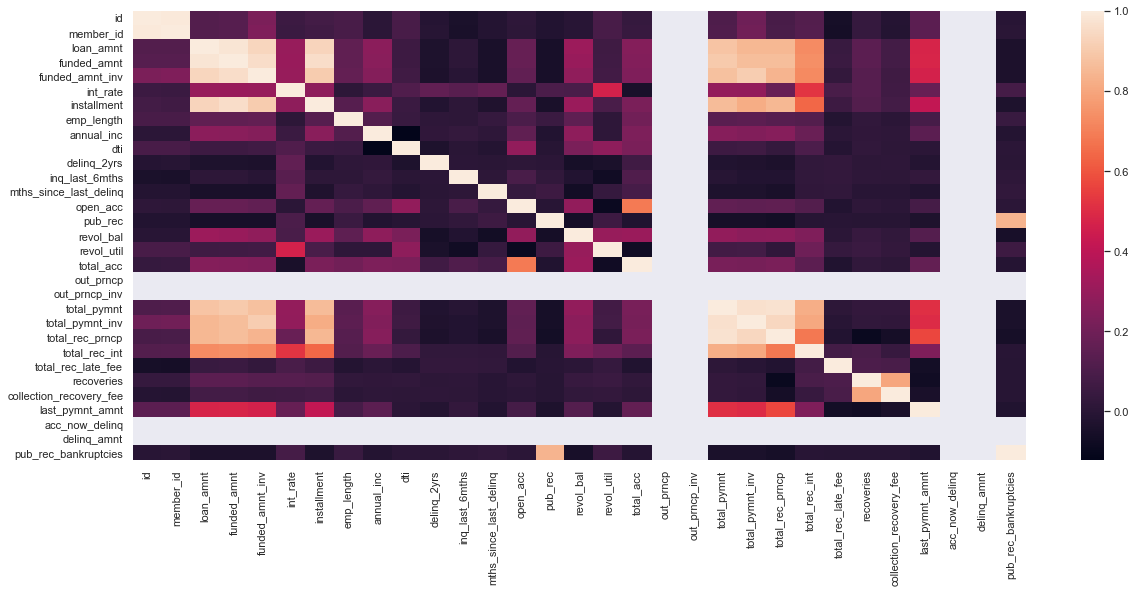

In [442]:
sns.set_theme(rc={'figure.figsize':(20,8.27)})

sns.heatmap(df1.corr())


<AxesSubplot:xlabel='loan_amnt', ylabel='emp_length'>

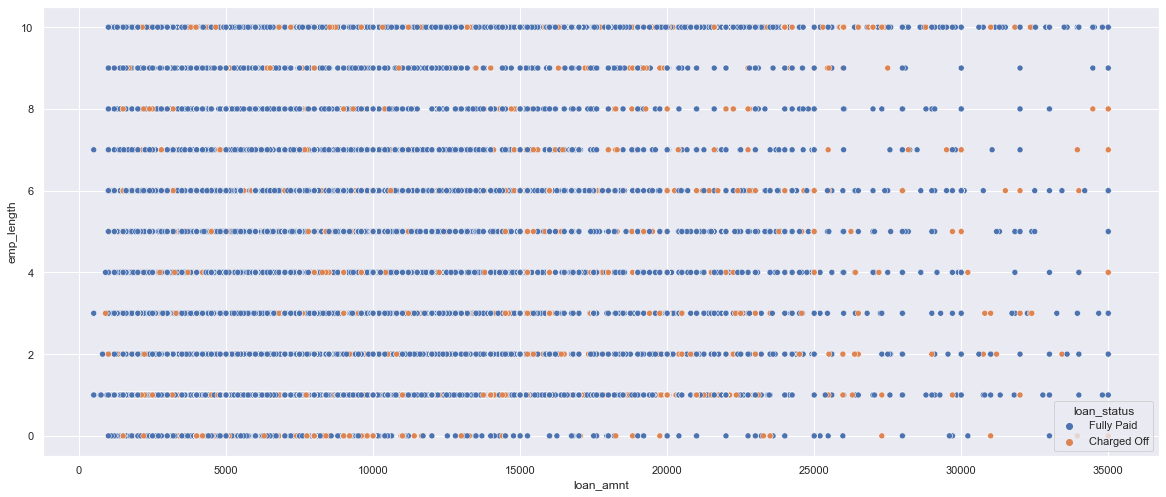

In [469]:
sns.scatterplot(x = df1.loan_amnt, y = df1.emp_length,  hue = df1.loan_status )

<AxesSubplot:xlabel='issue_d', ylabel='loan_amnt'>

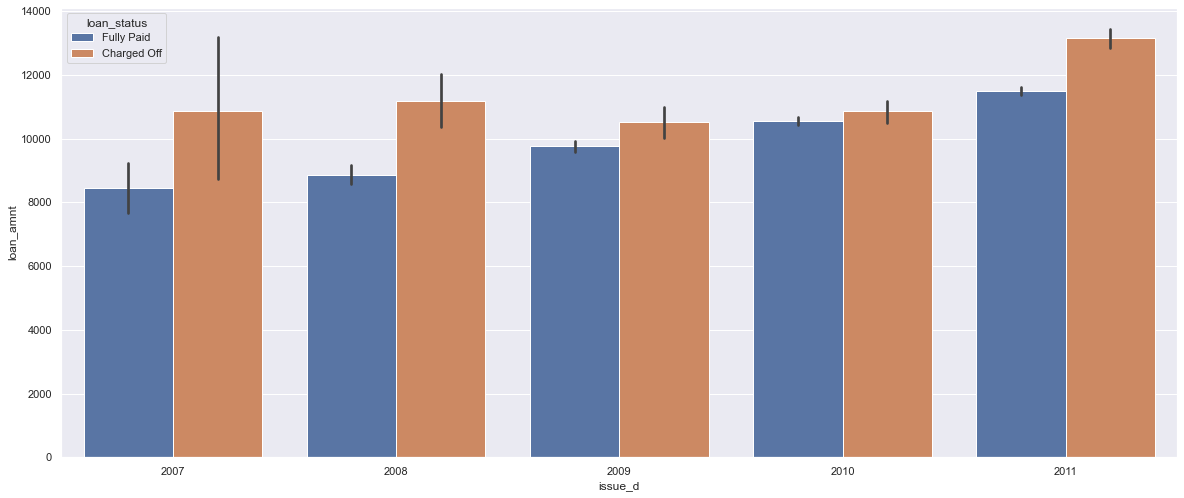

In [474]:
sns.barplot(x=df1.issue_d.dt.year, y = df1.loan_amnt,data = df1, hue = df1.loan_status)
sns.

<AxesSubplot:xlabel='emp_length', ylabel='Count'>

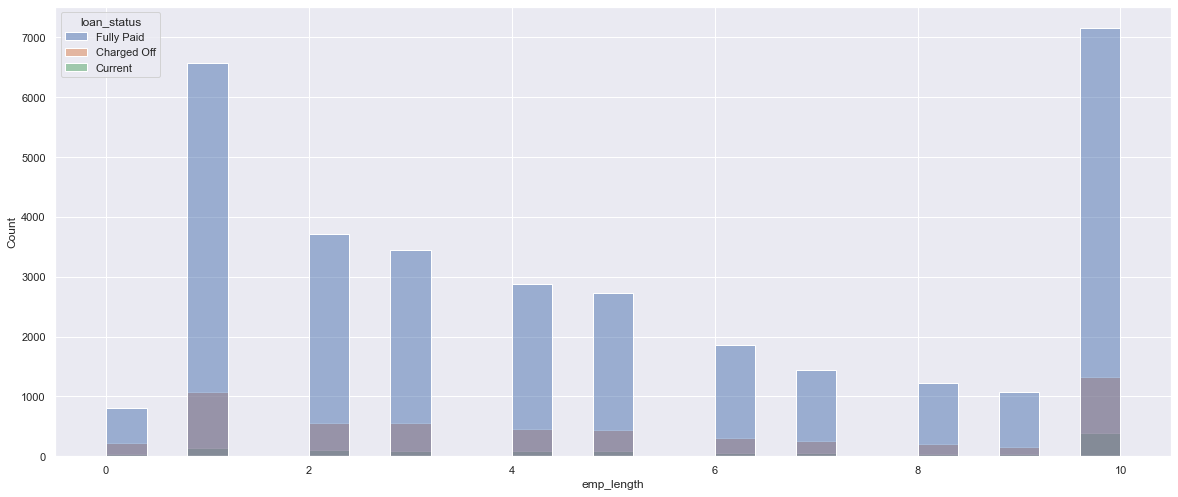

In [471]:
sns.histplot(data = df1, x= df1.emp_length, hue = df1.loan_status, color= 'r')

grade  loan_status
A      Fully Paid      9442
       Charged Off      596
B      Fully Paid     10249
       Charged Off     1410
C      Fully Paid      6477
       Charged Off     1318
D      Fully Paid      3954
       Charged Off     1102
E      Fully Paid      1941
       Charged Off      704
F      Fully Paid       654
       Charged Off      316
G      Fully Paid       198
       Charged Off       97
Name: loan_status, dtype: int64

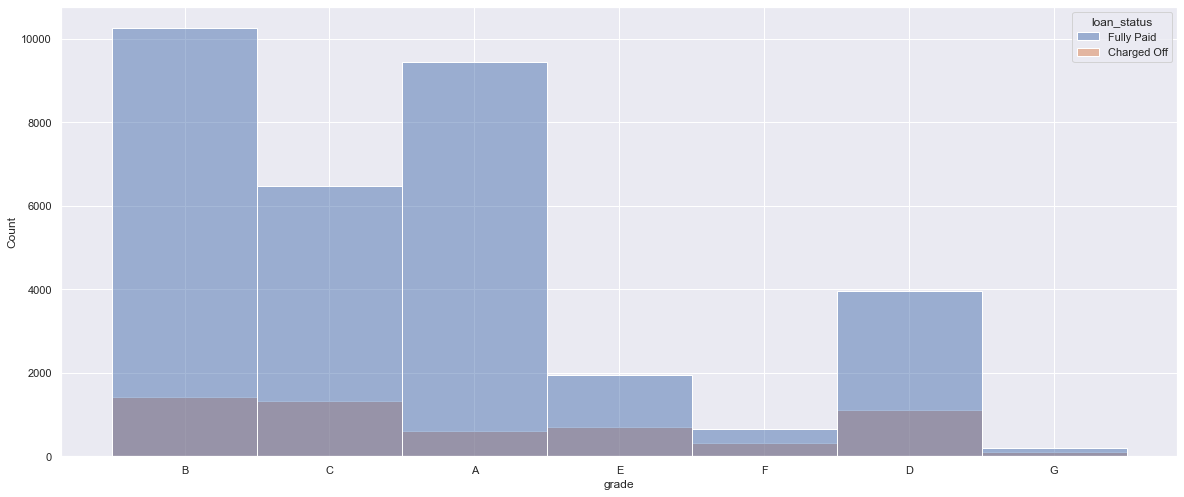

In [483]:
sns.histplot(data = df1, x= df1.grade, hue = df1.loan_status)


In [540]:
# l = df1.groupby('grade')['loan_status'].value_counts()
i = list(l.index)
#print(l[i[0]],  l[i[1]])
#print (l[i[0]],l[i[1]] )
for i in l.index:
    print(l[i[0][0]])
    #print(l[i[1]])
    #l[i[0], "Percentage"] = l[i[0]]/ (l[i[0]] + l[i[1]])

loan_status
Fully Paid     9442
Charged Off     596
Percentage        x
Name: loan_status, dtype: object
loan_status
Fully Paid     9442
Charged Off     596
Percentage        x
Name: loan_status, dtype: object
loan_status
Fully Paid     10249
Charged Off     1410
Percentage         x
Name: loan_status, dtype: object
loan_status
Fully Paid     10249
Charged Off     1410
Percentage         x
Name: loan_status, dtype: object
loan_status
Fully Paid     6477
Charged Off    1318
Percentage        x
Name: loan_status, dtype: object
loan_status
Fully Paid     6477
Charged Off    1318
Percentage        x
Name: loan_status, dtype: object
loan_status
Fully Paid     3954
Charged Off    1102
Percentage        x
Name: loan_status, dtype: object
loan_status
Fully Paid     3954
Charged Off    1102
Percentage        x
Name: loan_status, dtype: object
loan_status
Fully Paid     1941
Charged Off     704
Percentage        x
Name: loan_status, dtype: object
loan_status
Fully Paid     1941
Charged Off     7

In [461]:
df1.groupby(df1.last_pymnt_d.dt.year)['loan_status'].value_counts()

last_pymnt_d  loan_status
2008          Fully Paid       92
              Charged Off      45
2009          Fully Paid      329
              Charged Off     227
2010          Fully Paid     1334
              Charged Off     510
2011          Fully Paid     3953
              Charged Off    1032
2012          Fully Paid     7211
              Charged Off    1677
2013          Fully Paid     8228
              Charged Off    1219
2014          Fully Paid     8665
              Charged Off     601
2015          Fully Paid     2213
              Charged Off     218
2016          Fully Paid      890
              Charged Off      14
Name: loan_status, dtype: int64

In [468]:
df1.groupby(df1.issue_d.dt.year)['loan_status'].value_counts()

issue_d  loan_status
2007     Fully Paid       205
         Charged Off       45
2008     Fully Paid      1311
         Charged Off      243
2009     Fully Paid      4111
         Charged Off      580
2010     Fully Paid     10033
         Charged Off     1460
2011     Fully Paid     17255
         Charged Off     3215
Name: loan_status, dtype: int64

<AxesSubplot:xlabel='issue_d', ylabel='Count'>

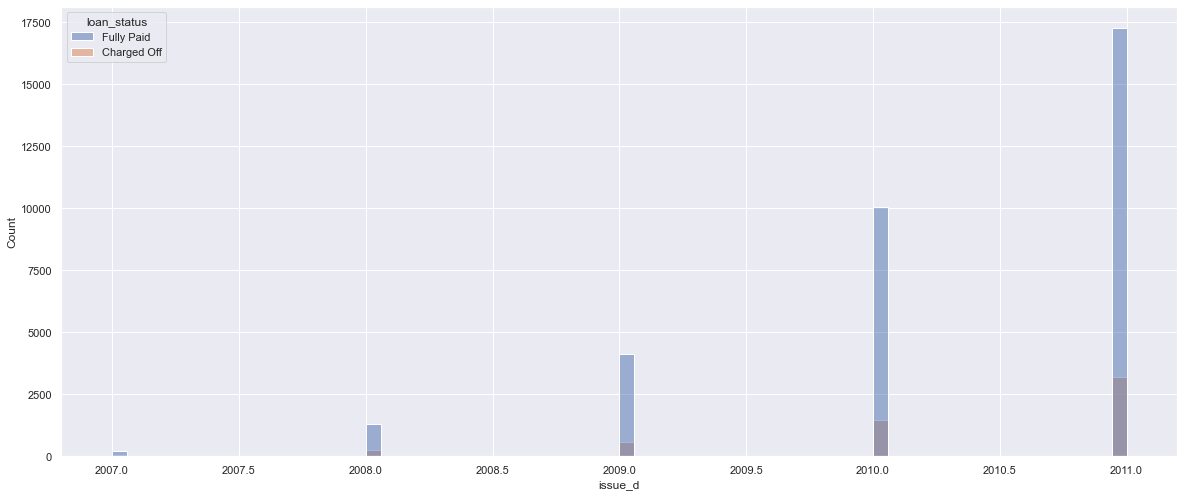

In [466]:
#loan_year = df1.groupby(df1.last_pymnt_d.dt.year)
sns.histplot(data =df1,  x = df1.issue_d.dt.year, hue = df1.loan_status)


<AxesSubplot:xlabel='term', ylabel='Count'>

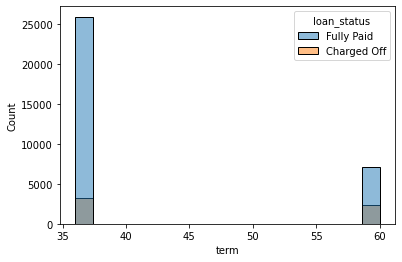

In [144]:
sns.histplot(data = df, x = df.term, hue = df.loan_status )

<AxesSubplot:xlabel='home_ownership', ylabel='Count'>

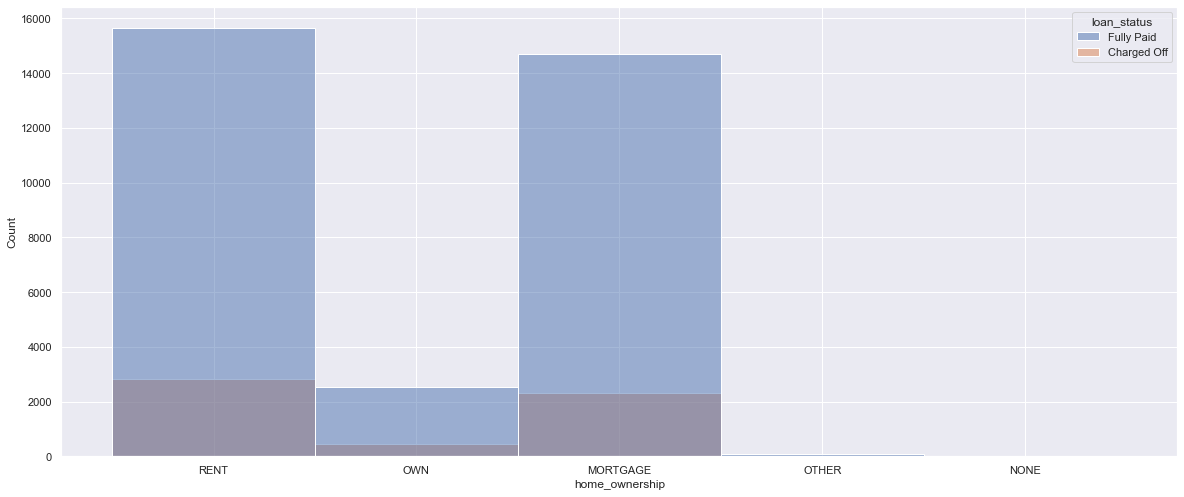

In [172]:
sns.histplot(data = df, x = df.home_ownership, hue = df.loan_status )

In [ ]:
sns.barplot(x= df.dti, y = df.loan_amnt, hue = df.loan_status)

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

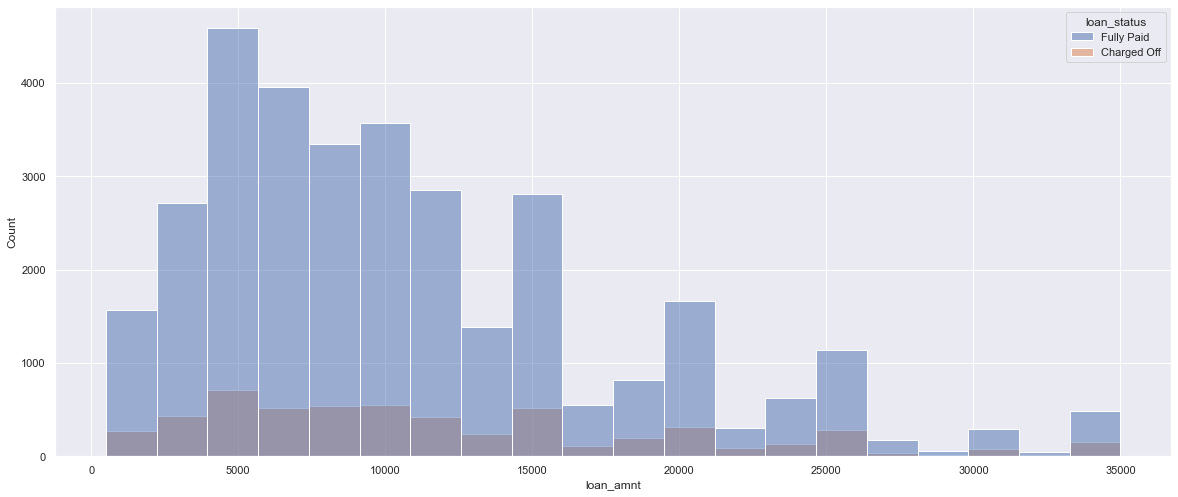

In [178]:
sns.histplot(data = df, x = df.loan_amnt, bins= 20 , hue = df.loan_status )

In [184]:
?sns.boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x2b68bdaa3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2b68b920be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b68bdaa7f0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b68b920640>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b68be9b970>],
 'means': []}

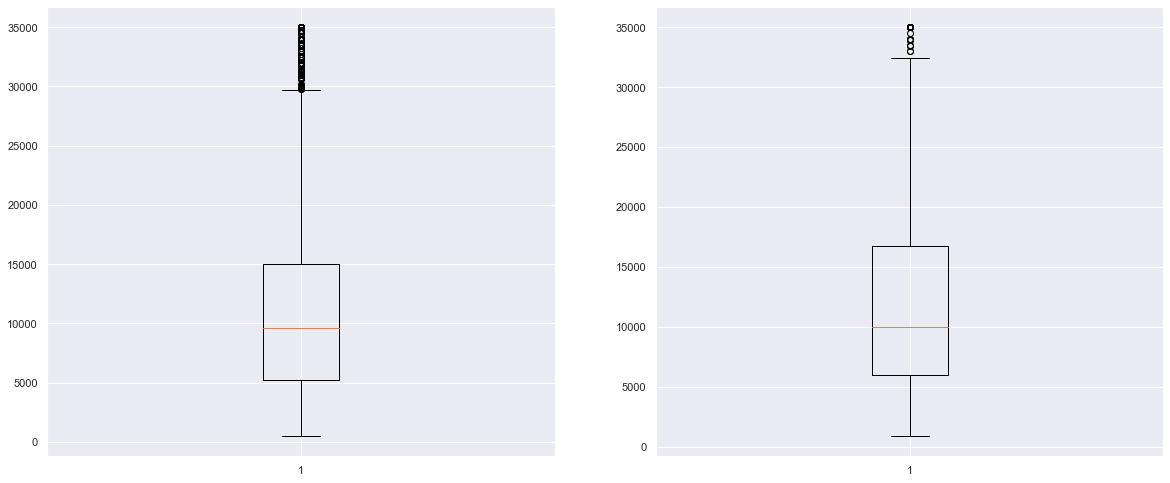

In [470]:
plt.subplots(1, 2)
plt.subplot(1, 2, 1)
plt.boxplot(df[df.loan_status =='Fully Paid'].loan_amnt)
plt.subplot(1, 2, 2)
plt.boxplot(df[df.loan_status =='Charged Off'].loan_amnt)